# 1. Generating research data
## 1.1. Logs for comparing minimax with/without alpha beta pruning

Running program for 10 starting positions. For each position, two games setups are played (player 1 uses pruning, player 2 does not, and inverted).
Game logs are saved to *{POSITION NUMBER}-p{PLAYER PRUNING}.log* file.

In [1]:
import subprocess

RUN_COMMAND = ["python", "__main__.py", "-md", "2", "-d1", "euclides", "-d2", "euclides"]

for position in ["99", "88", "77", "66", "55", "44", "33", "22", "11"]:
    for pruning_parameter in ["-p1", "-p2"]:
        print(f"START {position} {pruning_parameter}")
        subprocess.run(
            RUN_COMMAND + [pruning_parameter, "-p", position, "-l", f"research/logs/{position}{pruning_parameter}.log"], 
            cwd=".."
        )
        print("END")

START 99 -p1
Player 2 won after 330 rounds.
END
START 99 -p2
Player 2 won after 346 rounds.
END
START 88 -p1
Position repeated 3 times.
Draw after 371 rounds.
END
START 88 -p2
Position repeated 3 times.
Draw after 361 rounds.
END
START 77 -p1
Player 2 won after 290 rounds.
END
START 77 -p2
Player 2 won after 284 rounds.
END
START 66 -p1
Player 1 won after 309 rounds.
END
START 66 -p2
Position repeated 3 times.
Draw after 346 rounds.
END
START 55 -p1
Position repeated 3 times.
Draw after 381 rounds.
END
START 55 -p2
Position repeated 3 times.
Draw after 391 rounds.
END
START 44 -p1
Position repeated 3 times.
Draw after 341 rounds.
END
START 44 -p2
Player 1 won after 331 rounds.
END
START 33 -p1
Player 2 won after 266 rounds.
END
START 33 -p2
Player 2 won after 264 rounds.
END
START 22 -p1
Position repeated 3 times.
Draw after 333 rounds.
END
START 22 -p2
Position repeated 3 times.
Draw after 331 rounds.
END
START 11 -p1
Player 1 won after 269 rounds.
END
START 11 -p2
Player 1 won after 

## 1.2. Logs for comparing Euclidean, Chebyshev and Manhattan heuristics

Running program for 100 starting positions. For each position all the heuristics variation are used by players (inverting as before).
Game logs are saved to *{HEURISITC1}-{HEURISITC1}-{POSITION NUMBER}.log* file.

In [2]:
RUN_COMMAND = ["python", "__main__.py", "-md", "2", "-p1", "-p2", "-rl", "1000"]

for position in range(1, 101):
    for d1, d2 in [
        ("euclides", "chebyshev"), ("chebyshev", "euclides"), 
        ("manhattan", "chebyshev"), ("chebyshev", "manhattan"),
        ("manhattan", "euclides"), ("euclides", "manhattan"),
        
    ]:
        print(f"START {position} {d1} - {d2}")
        subprocess.run(
            RUN_COMMAND + ["-d1", d1, "-d2", d2, "-p", str(position), "-l", f"research/logs/{d1}-{d2}-{position}.log"], 
            cwd=".."
        )
        print("END")

START 1 euclides - chebyshev
Position repeated 3 times.
Draw after 560 rounds.
END
START 1 chebyshev - euclides
Position repeated 3 times.
Draw after 515 rounds.
END
START 1 manhattan - chebyshev
Draw after 301 rounds.
END
START 1 chebyshev - manhattan
Position repeated 3 times.
Draw after 444 rounds.
END
START 1 manhattan - euclides
Draw after 278 rounds.
END
START 1 euclides - manhattan
Position repeated 3 times.
Draw after 454 rounds.
END
START 2 euclides - chebyshev
Position repeated 3 times.
Draw after 366 rounds.
END
START 2 chebyshev - euclides
Position repeated 3 times.
Draw after 333 rounds.
END
START 2 manhattan - chebyshev
Player 1 won after 289 rounds.
END
START 2 chebyshev - manhattan
Player 1 won after 305 rounds.
END
START 2 manhattan - euclides
Position repeated 3 times.
Draw after 364 rounds.
END
START 2 euclides - manhattan
Position repeated 3 times.
Draw after 330 rounds.
END
START 3 euclides - chebyshev
Position repeated 3 times.
Draw after 474 rounds.
END
START 3 c

# 2. Fetching data from logs
## 2.1. Data for comparing minimax with/without alpha beta pruning

For all the generated logs - number of nodes visited and algorithm run time are collected and classified to all the moves using/not using pruning.

In [18]:
import os

from datetime import datetime

with_and_without_pruning_data = {
    mode: {
        "nodes_visited": [],
        "times": []
    }
    for mode in ("pruning", "no_pruning")
}

for file_name in os.listdir("logs"):
    if "-p1" in file_name:
        mode = {
            "1": "pruning", "2": "no_pruning"
        }
    elif "-p2" in file_name:
        mode = {
            "1": "no_pruning", "2": "pruning"
        }
    else:
        continue
    with open(os.path.join("logs", file_name), "r") as file:
        for line in file:
            words = line.split(" ")
            match words[1]:
                case "START":
                    start_time = words[0][1:-1]
                    start_time = datetime.strptime(start_time, "%H:%M:%S.%f")
                case "STOP":
                    stop_time = words[0][1:-1]
                    stop_time = datetime.strptime(stop_time, "%H:%M:%S.%f")
                    player = words[3]
                    with_and_without_pruning_data[mode[player]]["nodes_visited"].append(int(words[-1]))
                    with_and_without_pruning_data[mode[player]]["times"].append(stop_time - start_time)
                
with_and_without_pruning_data

{'pruning': {'nodes_visited': [4384,
   4852,
   773,
   659,
   3497,
   1035,
   3468,
   3035,
   3143,
   1961,
   2632,
   3563,
   4087,
   767,
   2788,
   3535,
   3388,
   2685,
   802,
   5911,
   869,
   831,
   833,
   5685,
   876,
   2052,
   909,
   726,
   3028,
   2721,
   1166,
   866,
   886,
   991,
   888,
   894,
   671,
   799,
   2500,
   3156,
   4639,
   2520,
   3052,
   3029,
   813,
   2795,
   2645,
   1834,
   2554,
   2541,
   2402,
   2355,
   1924,
   1898,
   1898,
   1844,
   1715,
   1397,
   1337,
   1413,
   1335,
   1367,
   1749,
   1900,
   1166,
   1092,
   1032,
   1143,
   1152,
   1995,
   930,
   1142,
   955,
   943,
   1093,
   909,
   901,
   2101,
   716,
   2043,
   865,
   1055,
   1477,
   723,
   824,
   877,
   936,
   985,
   985,
   985,
   973,
   970,
   753,
   539,
   534,
   525,
   284,
   288,
   253,
   940,
   245,
   569,
   203,
   278,
   544,
   367,
   199,
   225,
   223,
   205,
   238,
   221,
   185,
   181,
  

## 2.2. Data for comparing Euclidean, Chebyshev and Manhattan heuristics

For all the generated logs - list of winning games for each position is collected. List contains numbers of rounds needed, to win the game. It means that the length of the list for heuristic is number of games won with that heuristic.

In [72]:
distance_functions_data = {  # mapping distance function to number of rounds in winning games
    distance_function_name: []
    for distance_function_name in 
    ("chebyshev", "manhattan", "euclides")
}

for file_name in os.listdir("logs"):
    if file_name.count("-") != 2:
        continue
    distance_functions = file_name.split("-")[:2]
    with open(os.path.join("logs", file_name), "r") as file:
        result_info = next(reversed(file.readlines())).split(" ")
    winner = result_info[3]
    if winner == "0":  # draw
        continue
    rounds = int(result_info[-1])
    winner_distance_function = distance_functions[int(winner) - 1]
    distance_functions_data[winner_distance_function].append(rounds)
                
distance_functions_data

{'chebyshev': [385,
  323,
  223,
  377,
  421,
  413,
  263,
  307,
  371,
  325,
  445,
  501,
  421,
  507,
  247,
  353,
  263,
  333,
  390,
  345,
  333,
  336,
  287,
  341,
  347,
  421,
  325,
  408,
  309,
  367,
  335,
  263,
  451,
  299,
  391,
  353,
  405,
  313,
  457,
  389,
  399,
  325,
  307,
  413,
  303,
  257,
  355,
  305,
  421,
  239,
  297,
  413,
  457,
  333,
  337,
  283,
  345,
  341,
  327,
  283,
  209,
  335,
  303,
  342,
  309,
  449,
  295,
  347,
  345,
  337,
  415,
  359,
  233,
  327,
  441,
  369,
  399,
  236],
 'manhattan': [300,
  379,
  318,
  379,
  523,
  421,
  371,
  301,
  289,
  339,
  315,
  266,
  335,
  341,
  423,
  355,
  391,
  297,
  378,
  435,
  262,
  331,
  377,
  355,
  277,
  330,
  350,
  376,
  255,
  457,
  317,
  297,
  303,
  413,
  213,
  469,
  399,
  360,
  297,
  361,
  387,
  405,
  293,
  340,
  211,
  425,
  277,
  259,
  367,
  363,
  326,
  308,
  283,
  393,
  333,
  351,
  381,
  251,
  187,
  307,
  309,


# 3. Data visualisation
## 3.1. Comparing minimax with/without alpha beta pruning
### 3.1.1. Classifying comparison data.

Creating 2 dataframes containing visited nodes and times taken to run the algorithm. First dataframe represent minimax without pruning, second one minimax with pruning.

In [33]:
import pandas as pd

df_no_pruning = pd.DataFrame(with_and_without_pruning_data["no_pruning"])
df_no_pruning["times"] = df_no_pruning["times"].dt.total_seconds()
df_pruning = pd.DataFrame(with_and_without_pruning_data["pruning"])
df_pruning["times"] = df_pruning["times"].dt.total_seconds()


display(df_no_pruning.head())
display(df_pruning.head())

,nodes_visited,times
0,6264,0.390
1,6295,0.397
2,6185,0.387
3,6358,0.391
4,6092,0.381


,nodes_visited,times
0,4384,0.286
1,4852,0.304
2,773,0.047
3,659,0.039
4,3497,0.216


In [69]:
from matplotlib import pyplot as plt

def display_no_pruning_and_pruning_summary(column_name, column_alias):
    summary = pd.DataFrame({
        column_alias: [f"Average", f"Standard deviation", f"Median"],
        "Without Pruning": [df_no_pruning[column_name].mean().round(3), df_no_pruning[column_name].std().round(3), df_no_pruning[column_name].median().round(3)],
        "With Pruning": [df_pruning[column_name].mean().round(3), df_pruning[column_name].std().round(3), df_pruning[column_name].median().round(3)]
    })
    
    display(summary)
    
    plt.boxplot([df_no_pruning[column_name], df_pruning[column_name]], tick_labels=["Without Pruning", "With Pruning"])
    plt.ylabel(column_alias)
    plt.title(f"Comparing {column_alias} for minimax without/with pruning")
    plt.grid(True)
    plt.show()

### 3.1.2. Comparing algorithm run times

,time (s),Without Pruning,With Pruning
0,Average,0.164,0.061
1,Standard deviation,0.165,0.071
2,Median,0.093,0.034


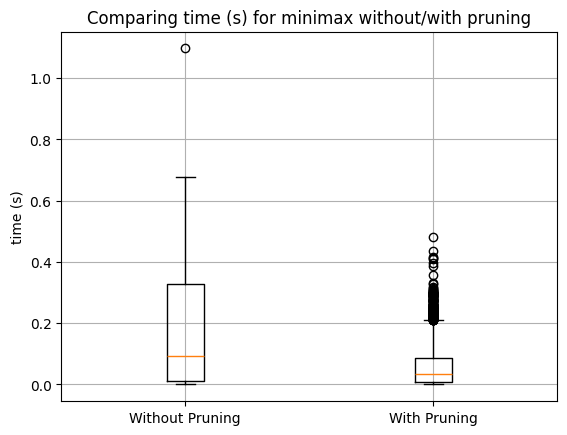

In [70]:
display_no_pruning_and_pruning_summary("times", "time (s)")

- Alpha-beta pruning drastically improves efficiency, cutting the time required by more than half.
- Pruning reduces variability, making performance more predictable.
- The results prove that pruning avoids unnecessary computations.

### 3.1.3. Comparing number of visited nodes


,nodes visited,Without Pruning,With Pruning
0,Average,2548.594,963.392
1,Standard deviation,2526.830,1118.355
2,Median,1476.000,544.500


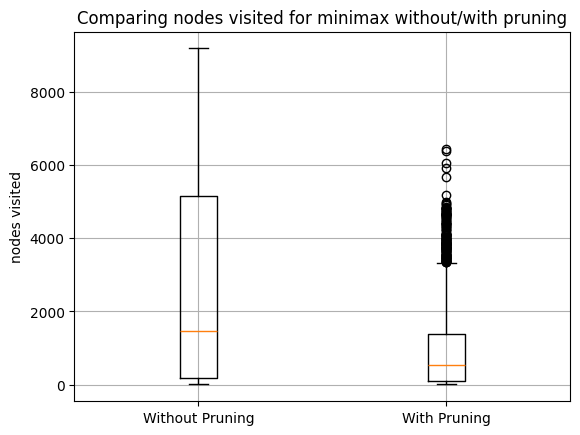

In [71]:
display_no_pruning_and_pruning_summary("nodes_visited", "nodes visited")

Alpha-beta pruning avoids exploring irrelevant branches, which is why both time and node visits are cut by comparable margins.

## 3.2. Comparing Euclidean, Chebyshev and Manhattan heuristics

{'chebyshev': 78, 'manhattan': 113, 'euclides': 207}

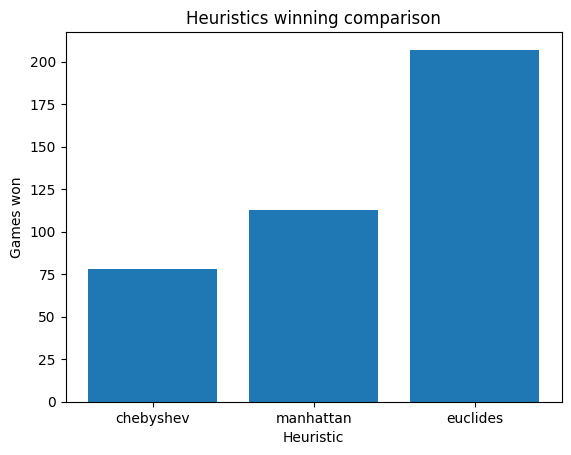

In [97]:
games_won = {
    distance_function: len(distance_functions_data[distance_function])
    for distance_function in ("chebyshev", "manhattan", "euclides")
}
display(games_won)

plt.bar(list(games_won.keys()), list(games_won.values()))
plt.title("Heuristics winning comparison")
plt.ylabel("Games won")
plt.xlabel("Heuristic")
plt.show()

Euclidean heuristic won more games than 2 other heuristics together, it was the most efficient. Manhattan result is slightly better than Chebyshev.

{'chebyshev': 347.85897435897436,
 'manhattan': 335.16814159292034,
 'euclides': 223.57004830917873}

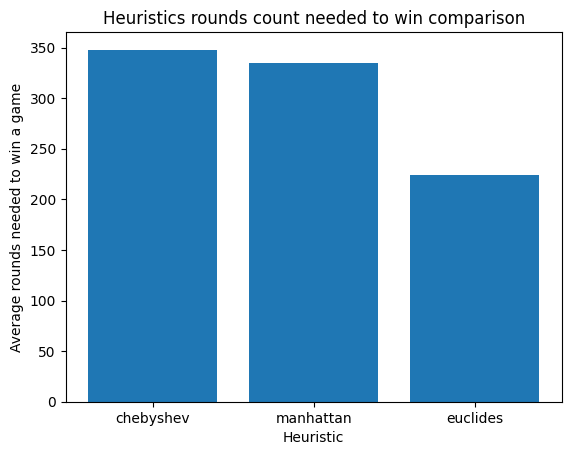

In [103]:
average_moves_count = {
    distance_function: sum(distance_functions_data[distance_function]) / len(distance_functions_data[distance_function])
    for distance_function in ("chebyshev", "manhattan", "euclides")
}
display(average_moves_count)

plt.bar(list(average_moves_count.keys()), list(average_moves_count.values()))
plt.title("Heuristics rounds count needed to win comparison")
plt.ylabel("Average rounds needed to win a game")
plt.xlabel("Heuristic")
plt.show()

When it comes to the count of moves done using the heuristic, Euclidean one is also the most efficient. Also, as before Chebyshev and Manhattan heuristics are comparable, Manhattan results are slightly better.

# 4. Results summary

## Alpha-Beta Pruning Efficiency
- Significantly reduces computation time by more than half by avoiding unnecessary branch exploration.
- Reduces variability, leading to more predictable performance.
- Cuts node visits proportionally to time savings, confirming that irrelevant branches are effectively pruned.
## Heuristic Performance Comparison
### Euclidean Heuristic Dominates:
- Won more games than the Manhattan and Chebyshev heuristics combined.
- Most efficient in both win rate and move count.
### Manhattan vs. Chebyshev:
- Manhattan performed slightly better than Chebyshev in both game outcomes and move efficiency.
- Results between the two were comparable, but Manhattan had a small edge.